In [43]:
#Dependencies

import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Create Salary DataFrame
salary_file = "./Datasets/Player - Salaries per Year (1990 - 2017).xlsx"
salary_df = pd.read_excel(salary_file)
salary_df.head()

,Register Value,Player Name,Salary in $,Season Start,Season End,Team,Full Team Name
0,1,A.C. Green,1750000,1990,1991,LAL,Los Angeles Lakers
1,354,A.C. Green,1750000,1991,1992,LAL,Los Angeles Lakers
2,727,A.C. Green,1750000,1992,1993,LAL,Los Angeles Lakers
3,1103,A.C. Green,1885000,1993,1994,PHO,Phoenix Suns
4,1497,A.C. Green,6472600,1994,1995,PHO,Phoenix Suns


In [6]:
#Create Draft DataFrame
draft_file = "./Datasets/draft78.csv"
draft_df = pd.read_csv(draft_file)
draft_df.head()

,Pick,Player,Yrs,Draft
0,1,Mychal Thompson,12.0,1978
1,2,Phil Ford,7.0,1978
2,3,Rick Robey,8.0,1978
3,4,Micheal Ray Richardson,8.0,1978
4,5,Purvis Short,12.0,1978


In [7]:
#Create Player DataFrame
player_file = "./Datasets/player_data.csv"
player_df = pd.read_csv(player_file)
player_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [8]:
#Clean player_df
player_df = player_df.drop(columns=['year_start', 'year_end'])
player_df.head()

,name,position,height,weight,birth_date,college
0,Alaa Abdelnaby,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,F,6-6,223.0,"November 3, 1974",San Jose State University


In [10]:
#Clean draft_df
draft_df = draft_df.drop(columns=['Yrs'])
draft_df.head()

,Pick,Player,Draft
0,1,Mychal Thompson,1978
1,2,Phil Ford,1978
2,3,Rick Robey,1978
3,4,Micheal Ray Richardson,1978
4,5,Purvis Short,1978


In [16]:
#Merging Salary and Draft Data Frames
Sal_draf_df = pd.merge(salary_df, draft_df, how='inner', left_on='Player Name', right_on='Player')
Sal_draf_df.head()

,Register Value,Player Name,Salary in $,Season Start,Season End,Team,Full Team Name,Pick,Player,Draft
0,1,A.C. Green,1750000,1990,1991,LAL,Los Angeles Lakers,23,A.C. Green,1985
1,354,A.C. Green,1750000,1991,1992,LAL,Los Angeles Lakers,23,A.C. Green,1985
2,727,A.C. Green,1750000,1992,1993,LAL,Los Angeles Lakers,23,A.C. Green,1985
3,1103,A.C. Green,1885000,1993,1994,PHO,Phoenix Suns,23,A.C. Green,1985
4,1497,A.C. Green,6472600,1994,1995,PHO,Phoenix Suns,23,A.C. Green,1985


In [23]:
#Merging New Salary data frame with player info data frame
final_df = pd.merge(Sal_draf_df, player_df, how='inner', left_on='Player Name', right_on='name')
final_df = final_df.drop(columns=['Player','name','Register Value','Team'])
final_df.head()

,Player Name,Salary in $,Season Start,Season End,Full Team Name,Pick,Draft,position,height,weight,birth_date,college
0,A.C. Green,1750000,1990,1991,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
1,A.C. Green,1750000,1991,1992,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
2,A.C. Green,1750000,1992,1993,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
3,A.C. Green,1885000,1993,1994,Phoenix Suns,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
4,A.C. Green,6472600,1994,1995,Phoenix Suns,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University


In [28]:
final_df = final_df.rename(columns={'Player Name':'player_name','Salary in $':'salary','Season Start':'season_start',
                          'Season End':'season_end','Full Team Name':'team_name','Pick':'draft_rank','draft':'draft_year'})
final_df.head()

,player_name,salary,season_start,season_end,team_name,draft_rank,draft_year,position,height,weight,birth_date,college
0,A.C. Green,1750000,1990,1991,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
1,A.C. Green,1750000,1991,1992,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
2,A.C. Green,1750000,1992,1993,Los Angeles Lakers,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
3,A.C. Green,1885000,1993,1994,Phoenix Suns,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University
4,A.C. Green,6472600,1994,1995,Phoenix Suns,23,1985,F-C,6-9,220.0,"October 4, 1963",Oregon State University


In [30]:
#Creating Database Connection
connection_string = "root:Piccolo7979@localhost/nba_db"
engine = create_engine(f'mysql://{connection_string}')

In [31]:
# Confirm tables
engine.table_names()

['nba_info']

In [34]:
#Load Data Frame into MySQL database
final_df.to_sql(name='nba_info', con=engine, if_exists='append', index=False)

In [72]:
#Salary vs Position Analysis
# new_df = final_df.drop(columns=['season_start','season_end'])
group_by_pos = final_df.groupby('position').mean()
group_by_pos


,salary,season_start,season_end,draft_rank,draft_year,weight
position,,,,,,
C,3.819359e+06,2003.246533,2004.246533,24.061633,1998.037750,254.385208
C-F,4.209366e+06,2003.809524,2004.809524,18.353383,1998.263158,241.894737
F,3.616699e+06,2004.483555,2005.483555,23.083625,1999.417425,229.952064
F-C,4.154151e+06,2001.486188,2002.486188,25.026703,1994.634438,234.884899
F-G,4.505493e+06,2003.554475,2004.554475,22.334630,1996.710117,214.029183
G,3.386710e+06,2003.694855,2004.694855,24.993199,1998.472797,190.770550
G-F,3.899139e+06,2003.987013,2004.987013,22.756789,1997.841795,209.441558


([<matplotlib.axis.XTick at 0x1183f6a90>,
 <a list of 7 Text xticklabel objects>)

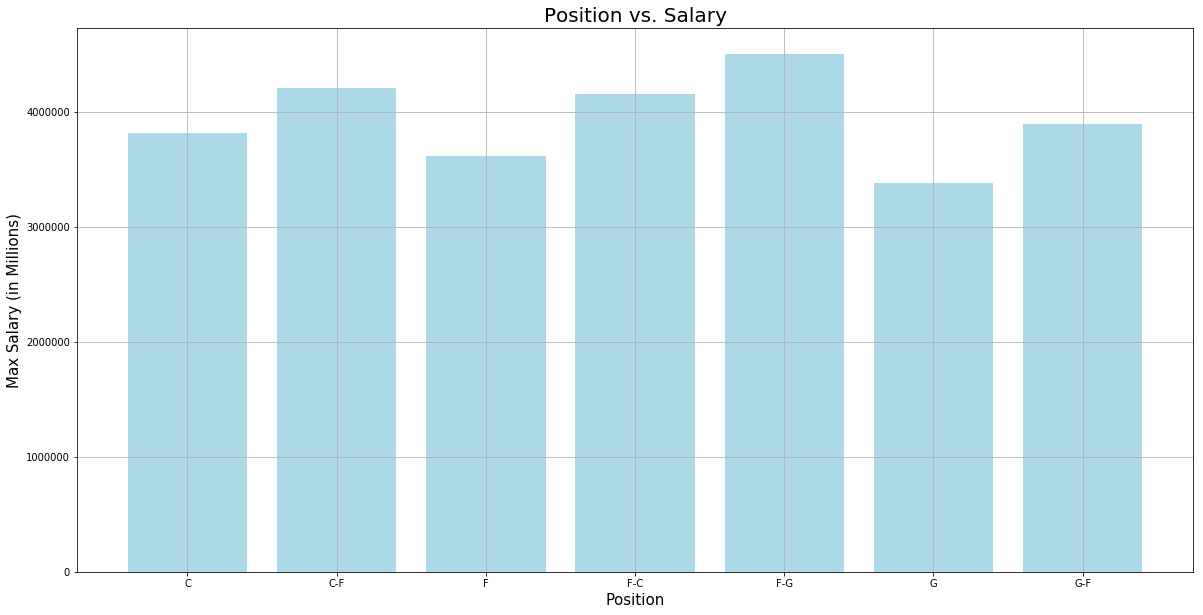

In [73]:
#Plot Average Rating By State
plt.figure(figsize = (20,10))
plt.bar(np.arange(0,len(group_by_pos),1),height = group_by_pos['salary'], color = 'lightblue', align = 'center', width = 0.8,)
plt.grid()
plt.title("Position vs. Average Salary", fontsize = 20)
plt.xlabel("Position", fontsize = 15)
plt.ylabel("Average Salary (in Millions)", fontsize = 15)
plt.xticks(np.arange(0,len(group_by_pos),1),('C','C-F','F','F-C','F-G','G','G-F'))

In [106]:
years = np.arange(1991,2019,1)

In [105]:
final_df1 = final_df.groupby(['position','season_end']).mean()

In [97]:
center = final_df1.loc['C',['salary']]

center_forward = final_df1.loc['C-F',['salary']]

forward = final_df1.loc['F',['salary']]

forward_center = final_df1.loc['F-C',['salary']]

forward_guard = final_df1.loc['F-G',['salary']]

guard = final_df1.loc['G',['salary']]

guard_forward = final_df1.loc['G-F',['salary']]

Text(0,0.5,'Salary (in Millions)')

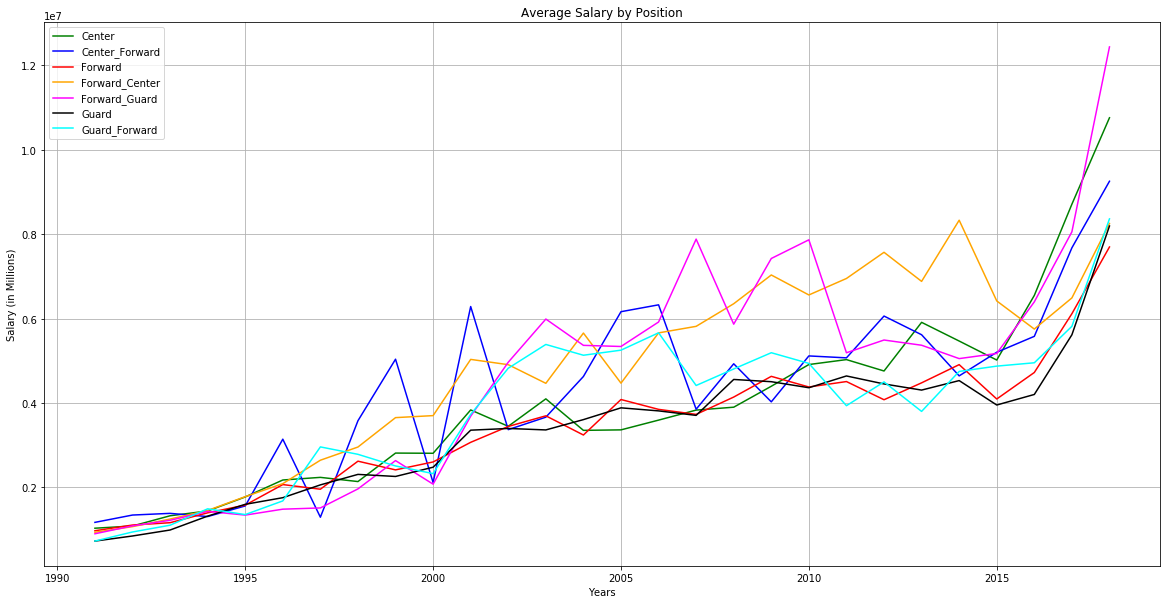

In [104]:
plt.figure(figsize = (20,10))

plt.plot(years,center['salary'],color='green',label='Center')
plt.plot(years,center_forward['salary'],color='blue',label='Center_Forward')
plt.plot(years,forward['salary'],color='red',label='Forward')
plt.plot(years,forward_center['salary'],color='orange',label='Forward_Center')
plt.plot(years,forward_guard['salary'],color='magenta',label='Forward_Guard')
plt.plot(years,guard['salary'],color='black',label='Guard')
plt.plot(years,guard_forward['salary'],color='cyan',label='Guard_Forward')

plt.grid()
plt.legend(loc="best")
plt.title("Average Salary by Position")
plt.xlabel("Years")
plt.ylabel("Salary (in Millions)")